# 01. Introduction

<img src = '../Images/01. Introduction/Image001.png'/>

# 02. Implementation

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [18]:
dfx = pd.read_csv('../Csv Files/xdata.csv')
dfy = pd.read_csv('../Csv Files/ydata.csv')

In [19]:
X = dfx.values
Y = dfy.values
print(X)
print(Y)
print(X.shape)
print(Y.shape)

[[ 1.00000000e+00  3.51627900e+00  3.71975047e+00]
 [ 2.00000000e+00  4.60649561e+00  3.41437943e+00]
 [ 3.00000000e+00  4.67701056e+00  3.04724443e+00]
 ...
 [ 3.97000000e+02  7.89625683e-01  9.31669806e-01]
 [ 3.98000000e+02 -1.00253042e+00 -6.76162472e-01]
 [ 3.99000000e+02  2.92386778e-01  5.61177823e-01]]
[[  1.   0.]
 [  2.   0.]
 [  3.   0.]
 [  4.   0.]
 [  5.   0.]
 [  6.   0.]
 [  7.   0.]
 [  8.   0.]
 [  9.   0.]
 [ 10.   0.]
 [ 11.   0.]
 [ 12.   0.]
 [ 13.   0.]
 [ 14.   0.]
 [ 15.   0.]
 [ 16.   0.]
 [ 17.   0.]
 [ 18.   0.]
 [ 19.   0.]
 [ 20.   0.]
 [ 21.   0.]
 [ 22.   0.]
 [ 23.   0.]
 [ 24.   0.]
 [ 25.   0.]
 [ 26.   0.]
 [ 27.   0.]
 [ 28.   0.]
 [ 29.   0.]
 [ 30.   0.]
 [ 31.   0.]
 [ 32.   0.]
 [ 33.   0.]
 [ 34.   0.]
 [ 35.   0.]
 [ 36.   0.]
 [ 37.   0.]
 [ 38.   0.]
 [ 39.   0.]
 [ 40.   0.]
 [ 41.   0.]
 [ 42.   0.]
 [ 43.   0.]
 [ 44.   0.]
 [ 45.   0.]
 [ 46.   0.]
 [ 47.   0.]
 [ 48.   0.]
 [ 49.   0.]
 [ 50.   0.]
 [ 51.   0.]
 [ 52.   0.]
 [ 53.   0.]

In [20]:
X = X[:,1:]
Y = Y[:,1:].reshape((-1,))

In [21]:
print(X.shape)
print(Y.shape)

(399, 2)
(399,)


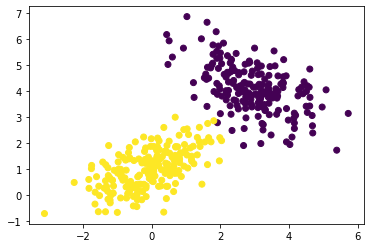

In [24]:
plt.scatter(X[:,0],X[:,1],c=Y)
plt.show()

In [28]:
plt.style.use('seaborn')

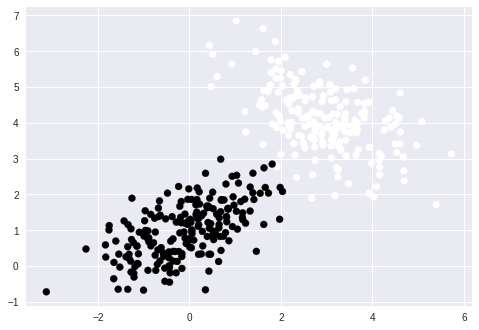

In [29]:
plt.scatter(X[:,0],X[:,1],c=Y)
plt.show()

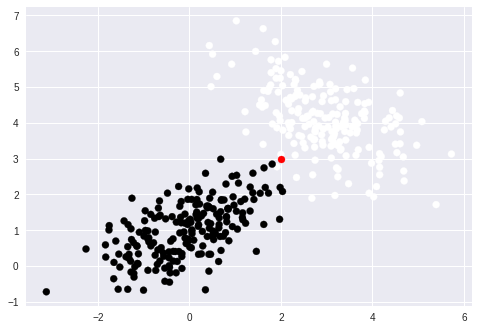

In [31]:
query_x = np.array([2,3])
plt.scatter(X[:,0],X[:,1],c=Y)
plt.scatter(query_x[0],query_x[1],color='red')
plt.show()

In [43]:
def dist(x1, x2):
    return np.sqrt(sum((x1-x2)**2))

def knn(X, Y, queryPoint, k=5):
    vals = []
    m = X.shape[0]
    for i in range(m):
        d = dist(queryPoint, X[i])
        vals.append((d,Y[i]))
        
    vals = sorted(vals)
    # Nearest / First K points
    vals = vals[:k]
    
    vals = np.array(vals)
    #print(vals)
    new_vals = np.unique(vals[:,1],return_counts = True)
    #print(new_vals)
    max_freq_index = new_vals[1].argmax()
    pred = new_vals[0][max_freq_index]
    return pred

In [44]:
x = knn(X,Y,query_x)
print(x)

0.0


In [45]:
x = knn(X,Y,[4,5])
print(x)

0.0


In [46]:
x = knn(X,Y,[0,1])
print(x)

1.0


# 03. Project : Recognizing MNIST Handwritten Digits Using KNN

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Step 1. Data Preparation

In [48]:
df = pd.read_csv('../Csv Files/train.csv')
print(df.shape)

(42000, 785)


In [49]:
print(df.columns)

Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)


In [50]:
df.head(n=5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [51]:
data = df.values
print(data.shape)
print(type(data))

(42000, 785)
<class 'numpy.ndarray'>


In [54]:
x = data[:,1:]
y = data[:,0]
print(x.shape)
print(y.shape)

(42000, 784)
(42000,)


In [116]:
split = int(0.998*x.shape[0]) # Ideal Split Ratio is 70 : 30
print(split)
X_train = x[:split,:]
Y_train = y[:split]

X_test = x[split:,:]
Y_test = y[split:]

print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

41916
(41916, 784) (41916,)
(84, 784) (84,)


In [117]:
# Visulise Some Samples

def drawImg(sample):
    img = sample.reshape((28,28))
    plt.imshow(img)
    plt.show()

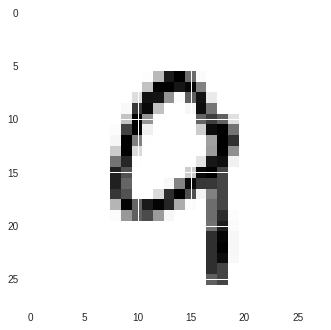

In [118]:
drawImg(X_train[31])

### Step 2. KNN 
- Non Parametric : Doesn't learn any parameter

In [119]:
# Can we apply KNN to this data?

In [120]:
 def dist(x1, x2):
    return np.sqrt(sum((x1-x2)**2))

def knn(X, Y, queryPoint, k=5):
    vals = []
    m = X.shape[0]
    for i in range(m):
        d = dist(queryPoint, X[i])
        vals.append((d,Y[i]))
        
    vals = sorted(vals)
    # Nearest / First K points
    vals = vals[:k]
    
    vals = np.array(vals)
    #print(vals)
    new_vals = np.unique(vals[:,1],return_counts = True)
    #print(new_vals)
    max_freq_index = new_vals[1].argmax()
    pred = new_vals[0][max_freq_index]
    return pred

### Step 3. Make Predictions

In [121]:
pred = knn(X_train,Y_train,X_test[3])
print(int(pred))

8


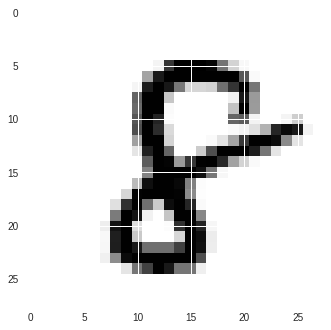

8


In [122]:
drawImg(X_test[3])
print(Y_test[3])

In [123]:
# Write one method which computes accuracy of KNN over test set !

def Accuracy(X_train,Y_train,X_test,Y_test):
    correct_prediction = 0
    incorrect_prediction = 0
    length = len(X_test)
    for i in range(len(X_test)):
        if Y_test[i] == knn(X_train,Y_train,X_test[i]):
            correct_prediction += 1
            #print("Yes")
        else:
            incorrect_prediction += 1
            #print("No")
        print(incorrect_prediction)
    return (correct_prediction*100)/length

In [124]:
print(Accuracy(X_train,Y_train,X_test,Y_test))

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
100.0
